# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 8</font>

## Download: http://github.com/dsacademybr

****** Este Jupyter Notebook foi atualizado para a versão 3.6.1 da Linguagem Python em 05/06/2017 ******

# Statsmodels

### Linear Regression Models

In [1]:
# Para visualização de gráficos
%matplotlib inline
from pylab import *

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(9876789)

/Users/dmpm/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Criando dados artificiais
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [4]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [5]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Tue, 06 Jun 2017   Prob (F-statistic):          2.83e-239
Time:                        15:46:20   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [6]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [  1.34233516  -0.04024948  10.01025357]
R2:  0.999987936503


In [7]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Tue, 06 Jun 2017   Prob (F-statistic):           6.30e-27
Time:                        15:46:20   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [8]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard errors:  [ 0.02640602  0.10380518  0.00231847  0.17121765]
Predicted values:  [  4.77072516   5.22213464   5.63620761   5.98658823   6.25643234
   6.44117491   6.54928009   6.60085051   6.62432454   6.6518039
   6.71377946   6.83412169   7.02615877   7.29048685   7.61487206
   7.97626054   8.34456611   8.68761335   8.97642389   9.18997755
   9.31866582   9.36587056   9.34740836   9.28893189   9.22171529
   9.17751587   9.1833565    9.25708583   9.40444579   9.61812821
   9.87897556  10.15912843  10.42660281  10.65054491  10.8063004
  10.87946503  10.86825119  10.78378163  10.64826203  10.49133265
  10.34519853  10.23933827  10.19566084  10.22490593  10.32487947
  10.48081414  10.66779556  10.85485568  11.01006072  11.10575781]


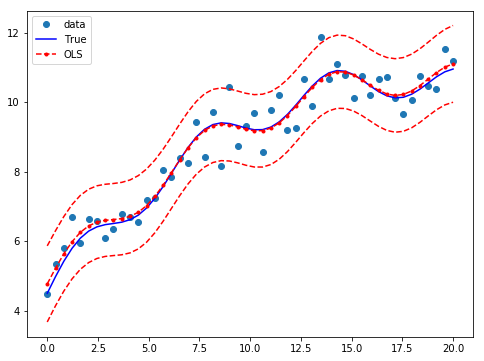

In [9]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')

### Time-Series Analysis

In [10]:
from statsmodels.tsa.arima_process import arma_generate_sample

In [11]:
# Gerando dados
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])

In [12]:
# Parâmetros
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)

In [13]:
dates = sm.tsa.datetools.dates_from_range('1980m1', length=nobs)
y = pd.Series(y, index=dates)
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

In [14]:
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -245.887
Method:                       css-mle   S.D. of innovations              0.645
Date:                Tue, 06 Jun 2017   AIC                            501.773
Time:                        15:46:21   BIC                            519.381
Sample:                    01-31-1980   HQIC                           508.860
                         - 10-31-2000                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.8411      0.403      2.089      0.038       0.052       1.630
ar.L2.y       -0.2693      0.247     -1.092      0.276      -0.753       0.214
ma.L1.y        0.5352      0.412      1.299      0.1

# Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>